In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from gym.envs.toy_text.frozen_lake import FrozenLakeEnv

In [2]:
def init(env):
    """
    env: OpenAI Gym Environment
    """
    Q = np.zeros((env.nS, env.nA))
    return Q

In [11]:
def policy(env, state, Q, epsilon):
    if np.random.rand() < epsilon: # epsilon-greedy policy
        return env.action_space.sample()
    else:
        return np.argmax(Q[state])

In [95]:
episodes = 50000
epsilon = 0.1
alpha = 0.4
discount = 0.99

env = FrozenLakeEnv()
Q = init(env)        

In [96]:
# This is a model free algor so learn while moving
episode_rewards = []
for e in range(episodes):
    state = env.reset()
    rewards = []
    while True:
        action = policy(env, state, Q, epsilon)
        q_now = Q[state][action] # Get current Q value
        
        next_state, reward, done, _ = env.step(action)
        rewards.append(reward)
        next_action = policy(env, next_state, Q, epsilon)
        q_next = Q[next_state][next_action] # Get next Q value with same policy (On-policy)
        
        Q[state][action] += alpha * (reward + discount*q_next - q_now)
        if done: # Q values of the terminal state is always 0.
            break
        state = next_state
    episode_rewards.append(np.mean(rewards))

[[ 0.33771783  0.20752479  0.19614968  0.20266071]
 [ 0.22776287  0.15487489  0.11775552  0.14993182]
 [ 0.09054624  0.15357428  0.09100406  0.08456151]
 [ 0.09751361  0.04050892  0.05670351  0.11984451]
 [ 0.28214573  0.12198068  0.1236755   0.14925116]
 [ 0.          0.          0.          0.        ]
 [ 0.19126037  0.02399868  0.02737975  0.00285664]
 [ 0.          0.          0.          0.        ]
 [ 0.03045146  0.16852042  0.07824578  0.37353575]
 [ 0.15761232  0.54850198  0.18954106  0.30416649]
 [ 0.56928322  0.32672605  0.13851412  0.22952485]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.22412591  0.18001525  0.61685325  0.48017129]
 [ 0.58861999  0.65439067  0.6356487   0.66757109]
 [ 0.          0.          0.          0.        ]]


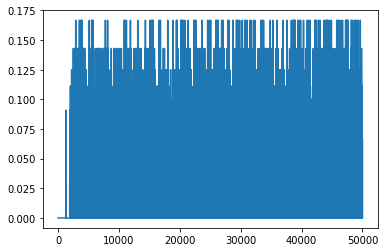

In [97]:
print(Q)
plt.plot(episode_rewards)

In [94]:
done = False
state = env.reset()
while not done:
    env.render()
    action = policy(env, state, Q, 0.0)
    state, _, done, _ = env.step(action)
env.render()


SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
